# Imports and global variables

In [1]:
import os
import sys
import numpy
import matplotlib.pyplot as pyplot
from numpy import ndarray
from typing import Generator

os.environ['GROMACS_PYTHON_BASE_PATH'] =  os.path.join(os.getcwd(), '../../../../python/src/modules')
sys.path.append(os.getenv('GROMACS_PYTHON_BASE_PATH'))

from line_graph import LineGraph

base_dir: str = os.getcwd()

# Extract time and protein distance from periodic boundary from `mindist.xvg`. Ignore comment lines

In [2]:
md_processed_data_path: str = os.path.join(base_dir, '../../data/processed/')

# Ignore comment lines in `mindist.xvg`. Comment lines start with '@', '#' or '&'
min_dist_gen: Generator = (line for line in open(os.path.join(md_processed_data_path, 'mindist.xvg'))
                           if not line[0] in ('@', '#', '&'))

min_dist_time: ndarray
distance: ndarray
min_dist_time, distance = numpy.genfromtxt(min_dist_gen).T

# Create Matplotlib graph to plot distance vs time

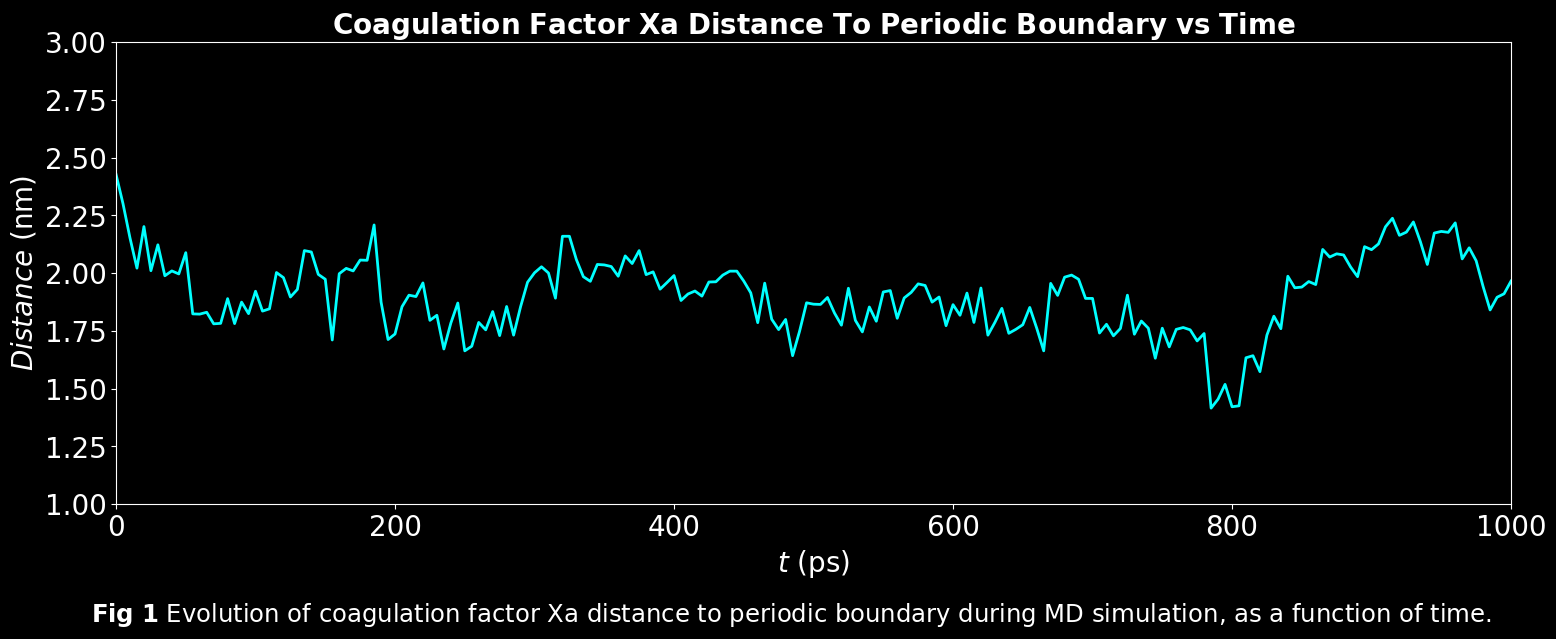

In [3]:
LineGraph.single_line_graph(
    data_arrays=[numpy.vstack((min_dist_time, distance))],
    figure_size=(18, 6), 
    line_colours=['cyan'], 
    x_label='$t$ (ps)', 
    y_label=r'$Distance$ (nm)',
    x_lim=(0, 1000),
    y_lim=(1, 3),
    graph_title=r'$\bf{Coagulation\ Factor\ Xa\ Distance\ To\ Periodic\ Boundary\ vs\ Time}$',
    figure_text=r'$\bf{Fig\ 1}$ Evolution of coagulation factor Xa distance to periodic boundary during MD '
                    r'simulation, as a function of time.',
    figure_text_font_size=17.5,
    figure_text_x_coord=0.5,
    figure_text_y_coord=-0.075,
    font_size=20, 
    tick_label_size=20, 
    line_width=2, 
    save_path=os.path.join(base_dir, '../../reports/figures/graphs/distance-vs-time.png')
)

# Extract time and RMSD data from `rmsd.xvg`

In [4]:
rmsd_time: ndarray
rmsd: ndarray
rmsd_time, rmsd = numpy.loadtxt(
    os.path.join(md_processed_data_path, 'rmsd_xray.xvg')
).T

# Create Matplotlib graph to plot RMSD vs time

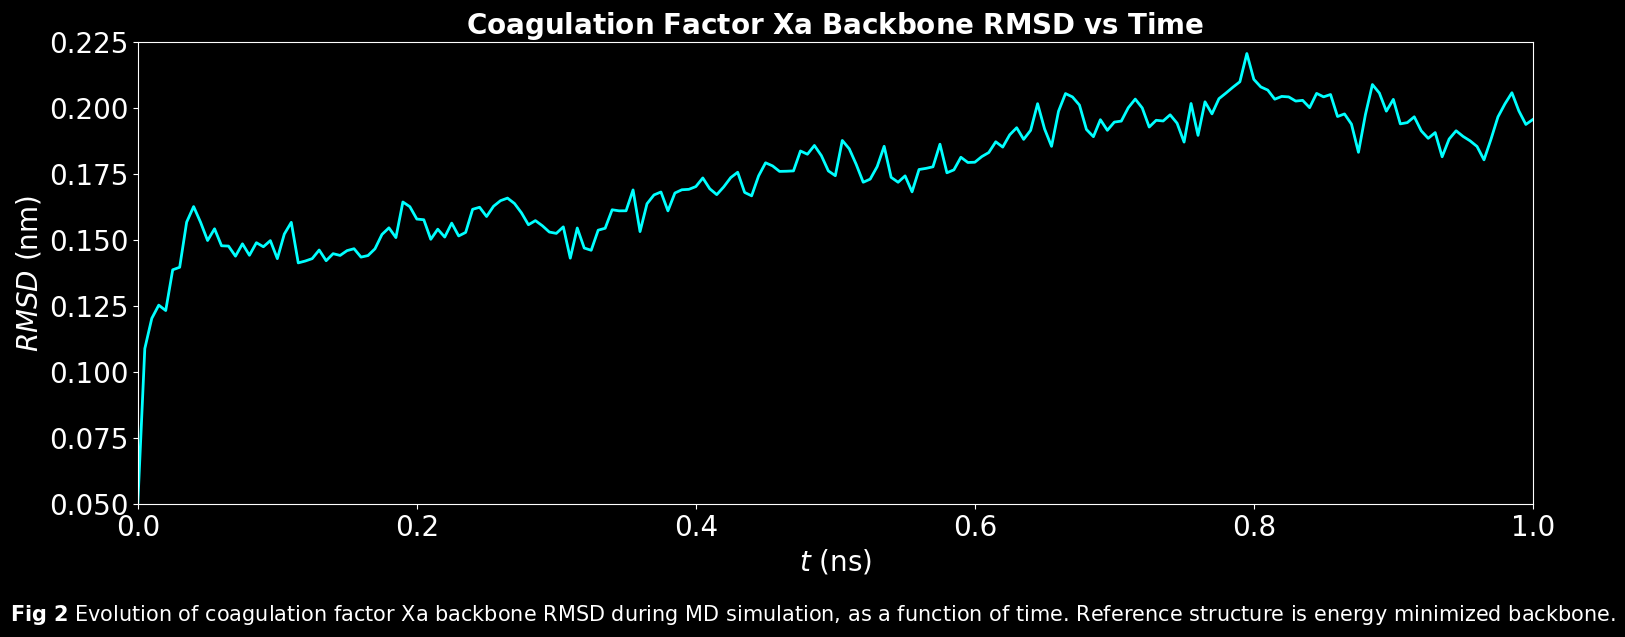

In [5]:
# Plot data
LineGraph.single_line_graph(
    data_arrays=[numpy.vstack((rmsd_time, rmsd))],
    figure_size=(18, 6), 
    line_colours=['cyan'], 
    x_label='$t$ (ns)', 
    y_label=r'$RMSD$ (nm)',
    x_lim=(0.0, 1.0), 
    y_lim=(0.05, 0.225), 
    graph_title=r'$\bf{Coagulation\ Factor\ Xa\ Backbone\ RMSD\ vs\ Time}$',
    figure_text=r'$\bf{Fig\ 2}$ Evolution of coagulation factor Xa backbone RMSD during MD simulation, as a '
                r'function of time. Reference structure is energy minimized backbone.',
    figure_text_font_size=15,
    figure_text_x_coord=0.5,
    figure_text_y_coord=-0.075,
    font_size=20, 
    tick_label_size=20, 
    line_width=2, 
    save_path=os.path.join(base_dir, '../../reports/figures/graphs/rmsd-vs-time.png')
)

# Extract time and radius of gyration data from `gyrate.xvg` (first two columns)

In [6]:
radius_gyration_vs_time: ndarray = numpy.loadtxt(
    os.path.join(md_processed_data_path, 'gyrate.xvg')
).T

rg_time: ndarray = radius_gyration_vs_time[0]
radius_gyration: ndarray = radius_gyration_vs_time[1]

# Create Matplotlib graph to plot radius of gyration vs time

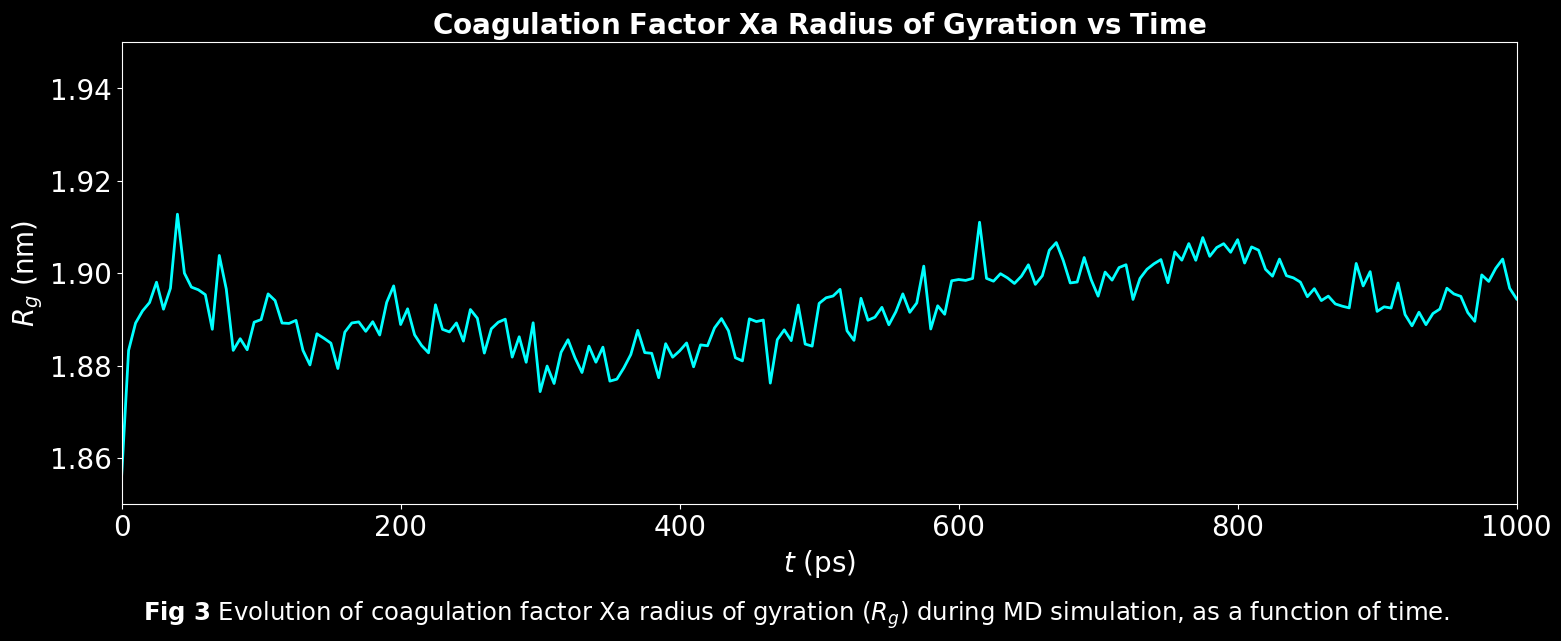

In [7]:
# Plot data
LineGraph.single_line_graph(
    data_arrays=[numpy.vstack((rg_time, radius_gyration))],
    figure_size=(18, 6), 
    line_colours=['cyan'], 
    x_label='$t$ (ps)', 
    y_label=r'$R_g$ (nm)',
    x_lim=(0, 1000),
    y_lim=(1.85, 1.95),  
    graph_title=r'$\bf{Coagulation\ Factor\ Xa\ Radius\ of\ Gyration\ vs\ Time}$',
    figure_text=r'$\bf{Fig\ 3}$ Evolution of coagulation factor Xa radius of gyration ($R_g$) during MD simulation, '
                r'as a function of time.',
    figure_text_font_size=17.5,
    figure_text_x_coord=0.5,
    figure_text_y_coord=-0.075,
    font_size=20, 
    tick_label_size=20, 
    line_width=2, 
    save_path=os.path.join(base_dir, '../../reports/figures/graphs/radius-gyration-vs-time.png')
)

# Extract time and hydrogen bond data from `hbnum.xvg` (first two columns)

In [8]:
h_bonds_vs_time: ndarray = numpy.loadtxt(
    os.path.join(md_processed_data_path, 'hbnum.xvg')
).T

h_bond_time: ndarray = h_bonds_vs_time[0]
h_bonds: ndarray = h_bonds_vs_time[1]

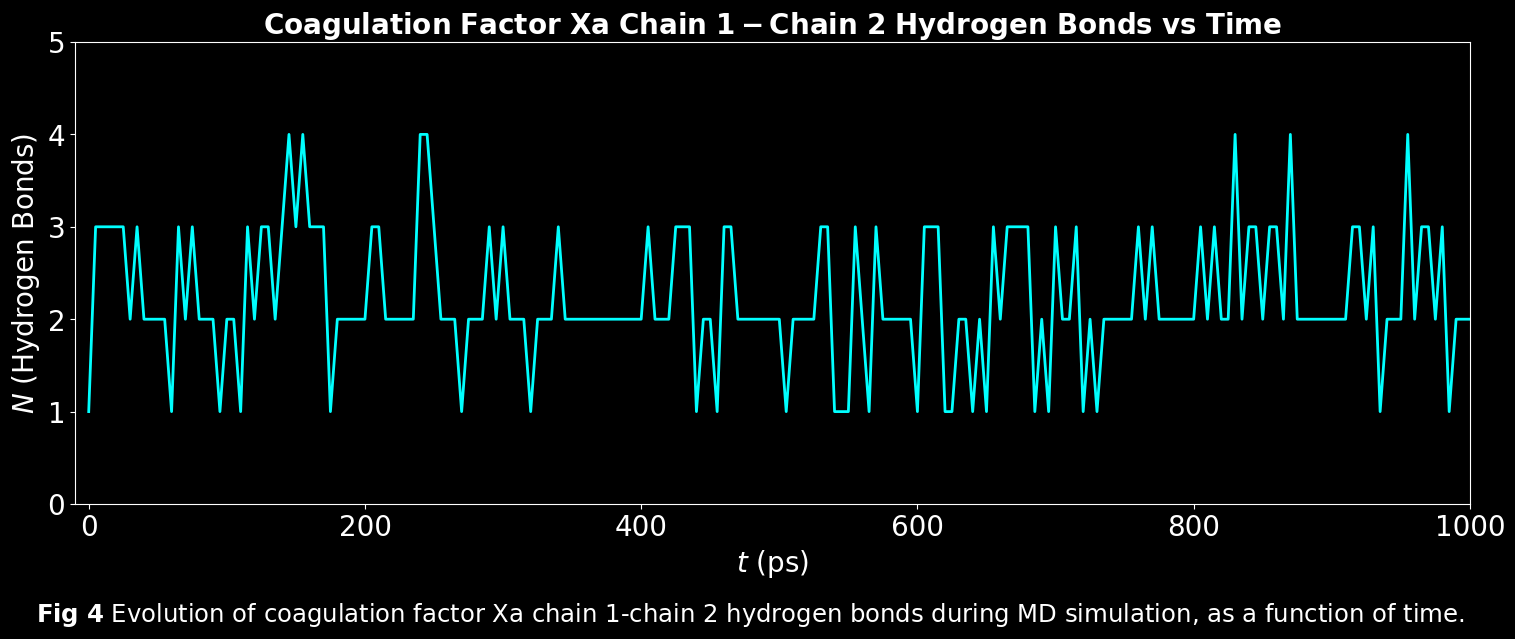

In [9]:
# Plot data
LineGraph.single_line_graph(
    data_arrays=[numpy.vstack((h_bond_time, h_bonds))],
    figure_size=(18, 6), 
    line_colours=['cyan'], 
    x_label='$t$ (ps)', 
    y_label=r'$N$ (Hydrogen Bonds)', 
    x_lim=(-10, 1000),
    y_lim=(0.0, 5.0),  
    graph_title=r'$\bf{Coagulation\ Factor\ Xa\ Chain\ 1-Chain\ 2\ Hydrogen\ Bonds\ vs\ Time}$',
    figure_text=r'$\bf{Fig\ 4}$ Evolution of coagulation factor Xa chain 1-chain 2 hydrogen bonds during MD '
                r'simulation, as a function of time.',
    figure_text_font_size=17.5,
    figure_text_x_coord=0.5,
    figure_text_y_coord=-0.075,
    font_size=20, 
    tick_label_size=20, 
    line_width=2, 
    save_path=os.path.join(base_dir, '../../reports/figures/graphs/h-bonds-vs-time.png')
)